In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os


# Mac OS의 경우와 그 외 OS의 경우로 나누어 설정

if os.name == 'posix':

    plt.rc("font", family="AppleGothic")

else:

    plt.rc("font", family="Malgun Gothic")


In [4]:
df = pd.read_csv('./basic.csv')
df

,Unnamed: 0,20111231,20121231,20131231,20141231,20151231,20161231,20171231,20181231,20191231,20201231
0,유동비율,321.604623,286.143240,311.899665,415.485748,320.782615,419.062707,388.928534,333.226330,464.212748,479.905718
1,부채비율,28.207079,29.029297,27.681109,23.497585,24.051292,24.547252,29.214289,23.636573,33.206888,29.781075
2,ROE,14.441248,16.269405,14.563743,17.954789,10.513438,14.731229,19.202914,16.501577,14.685940,20.739893
3,ROIC,8.638847,9.265590,9.983536,12.755768,7.403896,10.762070,11.876118,13.567128,10.219815,14.901217
4,영업이익률,22.290566,20.072731,27.123991,33.168245,28.327217,33.425872,33.263873,35.853522,28.156391,34.136210
5,매출액증가율,-7.699800,23.755420,0.416130,10.845429,-0.050148,17.327888,78.812407,-2.479427,-0.812195,42.029445
6,자기자본증가율,14.082674,17.513699,13.541500,18.712316,30.048145,5.957315,43.984600,-12.833902,5.598807,25.178350


In [5]:
df.rename(columns={'Unnamed: 0':'종류'}, inplace=True)

In [6]:
df.set_index('종류', inplace=True)

In [7]:
df.T.index

Index(['20111231', '20121231', '20131231', '20141231', '20151231', '20161231',
       '20171231', '20181231', '20191231', '20201231'],
      dtype='object')

In [8]:
df = df.T

In [9]:
df.index = pd.to_datetime(df.index)

In [10]:
df.index

DatetimeIndex(['2011-12-31', '2012-12-31', '2013-12-31', '2014-12-31',
               '2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31',
               '2019-12-31', '2020-12-31'],
              dtype='datetime64[ns]', freq=None)

In [11]:
df

종류,유동비율,부채비율,ROE,ROIC,영업이익률,매출액증가율,자기자본증가율
2011-12-31,321.604623,28.207079,14.441248,8.638847,22.290566,-7.699800,14.082674
2012-12-31,286.143240,29.029297,16.269405,9.265590,20.072731,23.755420,17.513699
2013-12-31,311.899665,27.681109,14.563743,9.983536,27.123991,0.416130,13.541500
2014-12-31,415.485748,23.497585,17.954789,12.755768,33.168245,10.845429,18.712316
2015-12-31,320.782615,24.051292,10.513438,7.403896,28.327217,-0.050148,30.048145
2016-12-31,419.062707,24.547252,14.731229,10.762070,33.425872,17.327888,5.957315
2017-12-31,388.928534,29.214289,19.202914,11.876118,33.263873,78.812407,43.984600
2018-12-31,333.226330,23.636573,16.501577,13.567128,35.853522,-2.479427,-12.833902
2019-12-31,464.212748,33.206888,14.685940,10.219815,28.156391,-0.812195,5.598807
2020-12-31,479.905718,29.781075,20.739893,14.901217,34.136210,42.029445,25.178350


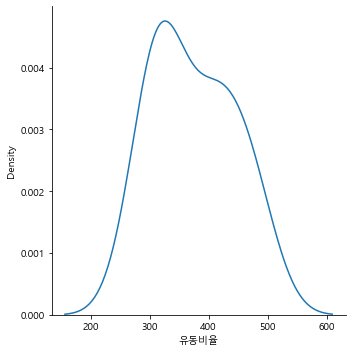

In [12]:
sns.displot(data=df, kind='kde', x='유동비율')

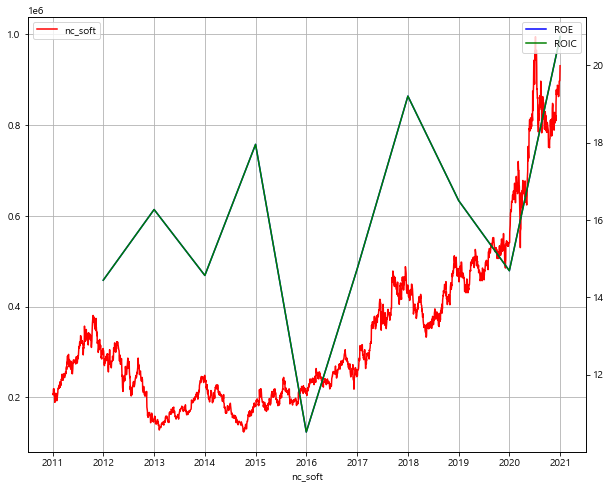

In [13]:
import pandas_datareader.data as web
import datetime

fig, ax1 = plt.subplots(figsize=(10, 8))
ax2 = ax1.twinx()
start = datetime.datetime(2011, 1, 1)
end = datetime.datetime(2020, 12, 31)

nc_soft = web.DataReader("036570.KS", "yahoo", start=start, end=end)

line1 = ax1.plot(nc_soft.index, nc_soft['Close'], color='r', label='nc_soft')

# line2 = ax2.plot(df.index, df['유동비율'], color='g', label='유동비율')
line3 = ax2.plot(df.index, df['ROE'], color='b', label='ROE')
line4 = ax2.plot(df.index, df['ROE'], color='g', label='ROIC')


ax1.set_xlabel('nc_soft')

ax1.legend(loc=0)
ax1.grid()
ax2.legend(loc=1)

plt.show()


In [14]:
df

종류,유동비율,부채비율,ROE,ROIC,영업이익률,매출액증가율,자기자본증가율
2011-12-31,321.604623,28.207079,14.441248,8.638847,22.290566,-7.699800,14.082674
2012-12-31,286.143240,29.029297,16.269405,9.265590,20.072731,23.755420,17.513699
2013-12-31,311.899665,27.681109,14.563743,9.983536,27.123991,0.416130,13.541500
2014-12-31,415.485748,23.497585,17.954789,12.755768,33.168245,10.845429,18.712316
2015-12-31,320.782615,24.051292,10.513438,7.403896,28.327217,-0.050148,30.048145
2016-12-31,419.062707,24.547252,14.731229,10.762070,33.425872,17.327888,5.957315
2017-12-31,388.928534,29.214289,19.202914,11.876118,33.263873,78.812407,43.984600
2018-12-31,333.226330,23.636573,16.501577,13.567128,35.853522,-2.479427,-12.833902
2019-12-31,464.212748,33.206888,14.685940,10.219815,28.156391,-0.812195,5.598807
2020-12-31,479.905718,29.781075,20.739893,14.901217,34.136210,42.029445,25.178350


<AxesSubplot:>

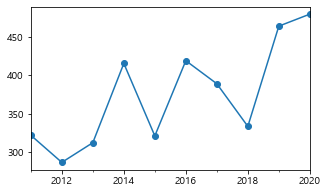

In [34]:
df['유동비율'].plot(figsize=(5, 3), marker='o')


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

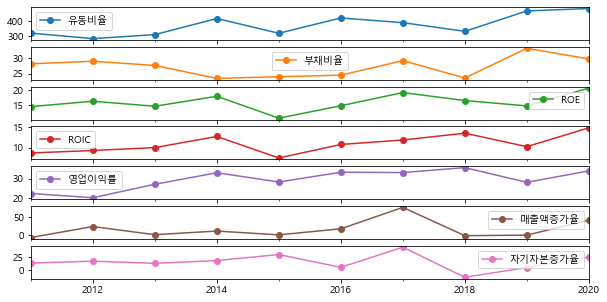

In [46]:
df.plot(subplots=True, figsize=(10, 5), marker='o')


array([<AxesSubplot:xlabel='Date'>], dtype=object)

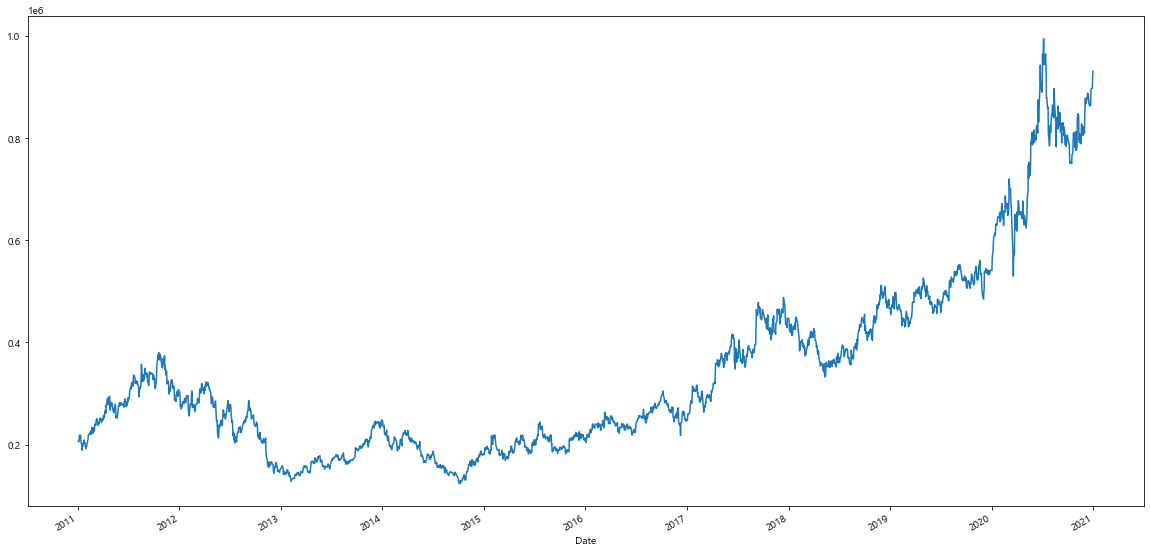

In [17]:
nc_soft['Close'].plot(subplots=True, figsize=(20, 10))


In [18]:
sns.regplot(x=df['ROE'], y=nc_soft['Close'])

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 10 and the array at index 1 has size 2462